# Predicting Loan Approval using machine learning

This notebook conducts a thorough investigation of Python-based libraries in the areas of data science and machine learning. Building a powerful machine learning model and an advanced visualisation framework are the main goals. The goal of this model is to accurately forecast the probability of loan acceptance by examining a wide range of factors included in the dataset. The initiative seeks to shed light on the elements that significantly affect loan approval decisions by using sophisticated methodologies and utilising the capabilities of these libraries. Combining visualisation with predictive modelling allows for the development of a potent tool for well-informed decision-making in the field of loan evaluation, as well as a deeper knowledge of the underlying data patterns.

## 1. Problem Definition

The problem is to figure out whether a person will get loan or not based on the features present in the dataset.

## 2. Data

The data is taken from the kaggle - https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset

## 3. Features

1. loan_id - id number of every loan
2. no_of_dependents - Number of Dependents of the Applicant
3. education - Education of the Applicant
4. self_employed - Employment Status of the Applicant
5. income_annum - Annual Income of the Applicant
6. loan_amount - Amount of loan
7. loan_term - Loan Term in Years
8. cibil_score - Credit Score
9. residential_assets_value - Value of the persons Real Estate Assets
10. commercial_assets_value - Value of the persons commercial Assets
11. luxury_assets_value - Value of the persons Luxury Assets
12. bank_asset_value - Value of the persons Bank Assets
13. loan_status - Loan Approval Status

## Importing necessary libraries

The below code block contains all the libraries that are neccesary to make this project work.

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import randint
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
import pickle
import shutil

## Load data

under this section we will write the code neccesarry to load our data

### Mounting the google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/Loan Approval Prediction/loan_approval_dataset.csv'
df = pd.read_csv(file_path)
df.shape # (rows, columns)

(4269, 13)

## Iterating over the data

In this section we will iterate or try to understand the data to find any relation the know more about the data.


In [4]:
df.head(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected


### Getting the discription of the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


### Checking for missing values in the columns of the data

In [6]:
df.isna().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

## Visualization of the data

In this section I created visualization to understand our data and check the relation between diffrent features amongst themselves and with the target feature.

### 1. Distribution of Loan Status

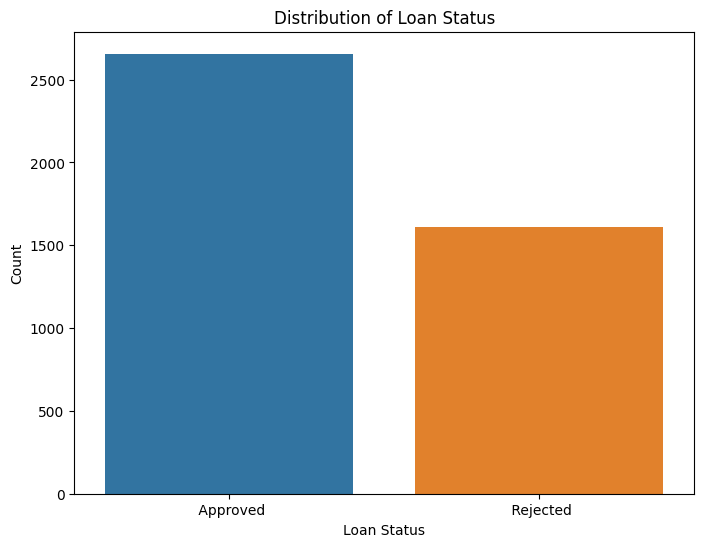

In [7]:
# Remove leading and trailing spaces from column names
df.columns = df.columns.str.strip()

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='loan_status')
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

### 2. Correlation Heatmap

<ipython-input-8-deedbfbd3132>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


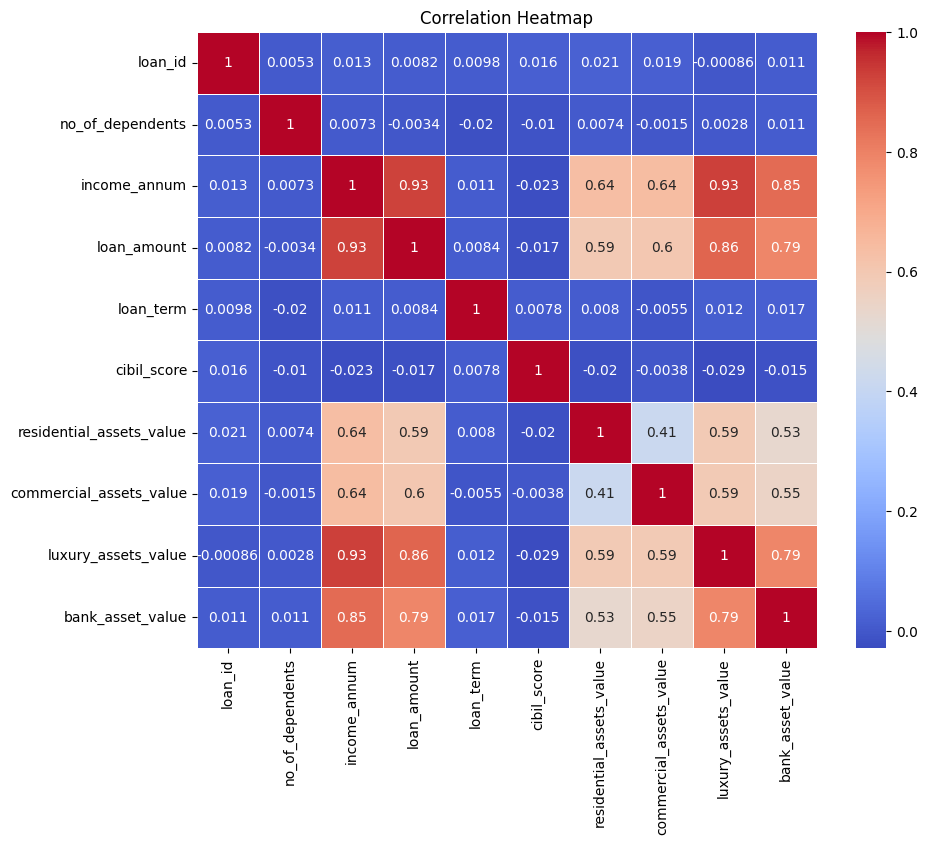

In [8]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### 3. Categorical Feature Proportions

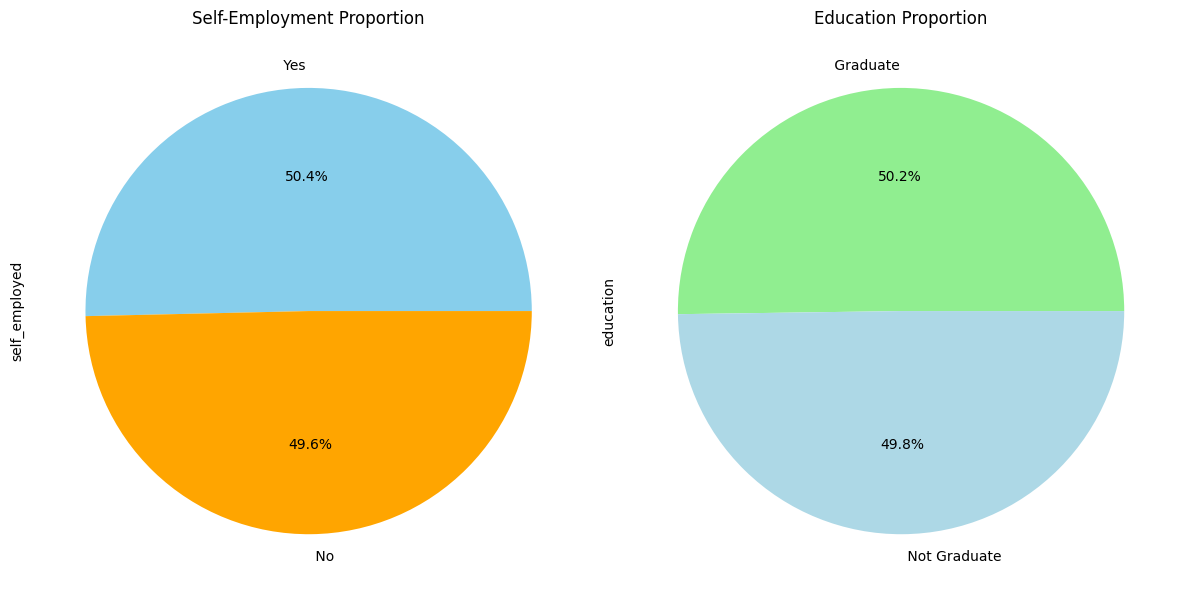

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

df['self_employed'].value_counts().plot(kind='pie', ax=axes[0], autopct='%1.1f%%', colors=['skyblue', 'orange'])
axes[0].set_title('Self-Employment Proportion')

df['education'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', colors=['lightgreen', 'lightblue', 'lightcoral'])
axes[1].set_title('Education Proportion')

plt.tight_layout()
plt.show()

### 4. Income vs. CIBIL Score

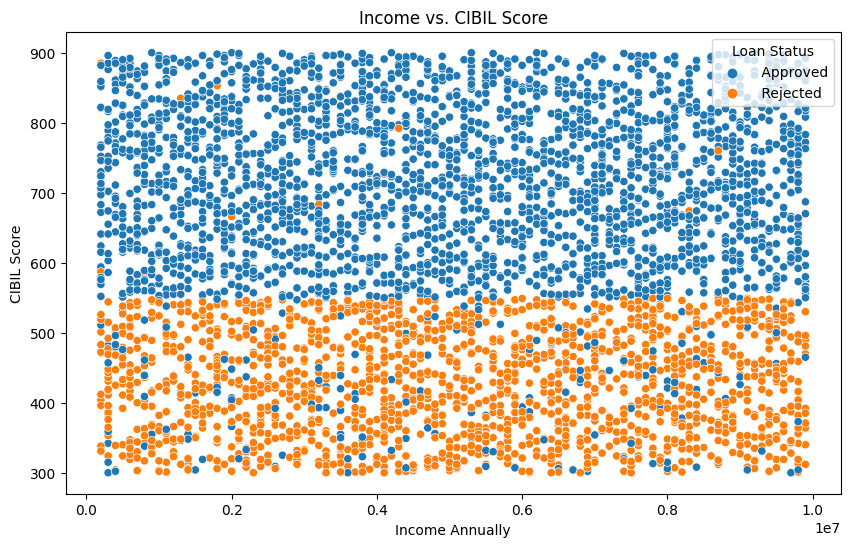

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='income_annum', y='cibil_score', hue='loan_status')
plt.title('Income vs. CIBIL Score')
plt.xlabel('Income Annually')
plt.ylabel('CIBIL Score')
plt.legend(title='Loan Status')
plt.show()

### 5. Income and Loan Amount by Loan Status

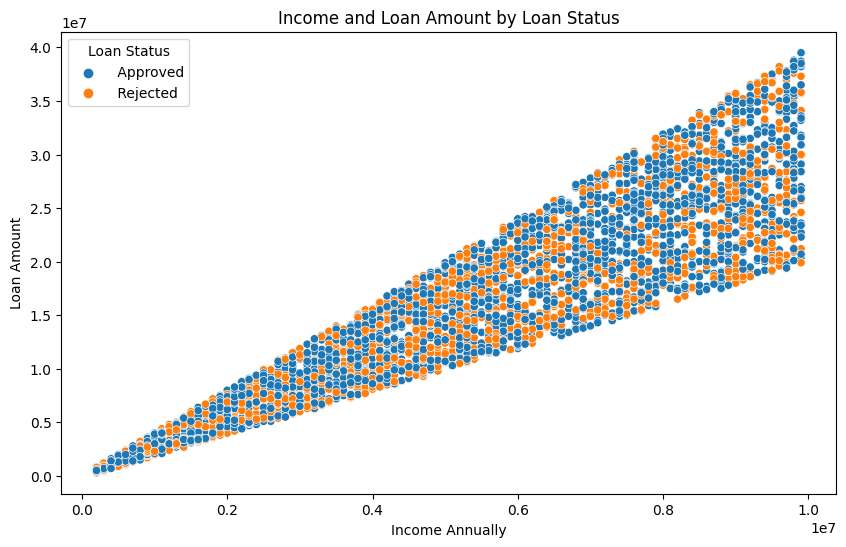

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='income_annum', y='loan_amount', hue='loan_status')
plt.title('Income and Loan Amount by Loan Status')
plt.xlabel('Income Annually')
plt.ylabel('Loan Amount')
plt.legend(title='Loan Status')
plt.show()

6. Loan Term and CIBIL Score by Loan Status

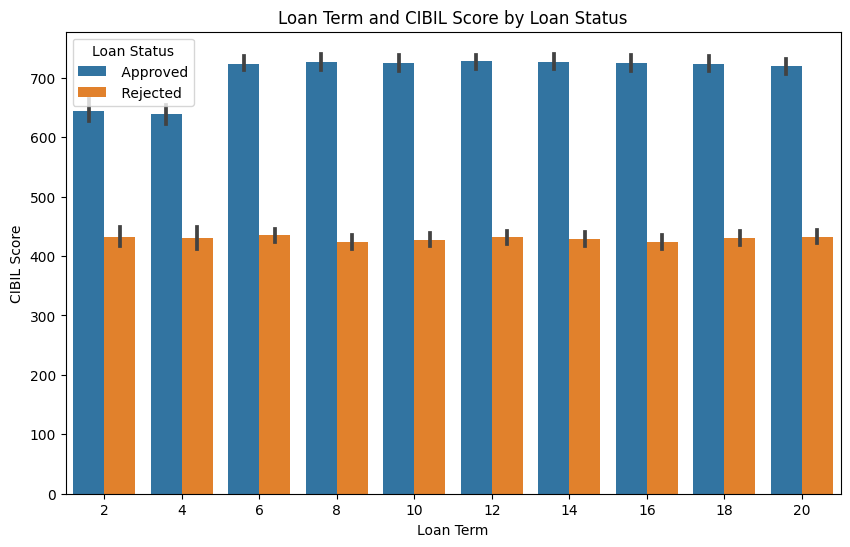

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='loan_term', y='cibil_score', hue='loan_status')
plt.title('Loan Term and CIBIL Score by Loan Status')
plt.xlabel('Loan Term')
plt.ylabel('CIBIL Score')
plt.legend(title='Loan Status')
plt.show()

### 7. Residential Assets vs. Commercial Assets

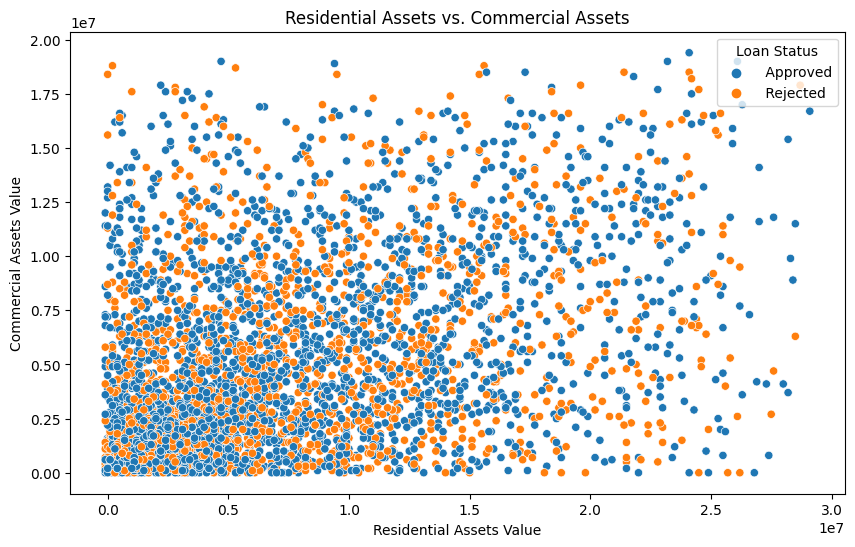

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='residential_assets_value', y='commercial_assets_value', hue='loan_status')
plt.title('Residential Assets vs. Commercial Assets')
plt.xlabel('Residential Assets Value')
plt.ylabel('Commercial Assets Value')
plt.legend(title='Loan Status')
plt.show()

## Converting all categorical columns into numerical format

In [14]:
label_encoder = LabelEncoder()

# Apply Label Encoding to each categorical column
categorical_columns = ['education', 'self_employed', 'loan_status']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Display the first few rows of the modified dataset
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


## Making the test and train dataset

In [15]:
df = df.drop(columns=['loan_id'])
# Split data into X and y
X = df.drop("loan_status", axis=1)
y = df["loan_status"]

# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
X

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000
...,...,...,...,...,...,...,...,...,...,...,...
4264,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000
4265,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000
4266,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000
4267,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000


In [17]:
y

0       0
1       1
2       1
3       1
4       1
       ..
4264    1
4265    0
4266    1
4267    0
4268    0
Name: loan_status, Length: 4269, dtype: int64

## Using ML Models

In this section we will use diffrent ML models on the dataset and check which Model will give us a higher accuracy and the time taken by the model to run.


In [18]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier()
}

In [19]:
import time

# Train and evaluate models
# Initialize an empty dictionary to store accuracy scores
accuracy_scores = {}

# Train and evaluate models
for name, model in models.items():
    start_time = time.time()  # Record start time
    model.fit(X_train, y_train)
    end_time = time.time()  # Record end time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Store accuracy score in the dictionary (multiplied by 100)
    accuracy_scores[name] = accuracy * 100

    training_time = end_time - start_time
    print(f"{name} - Accuracy: {accuracy:.4f} - Training Time: {training_time:.4f} seconds")

Logistic Regression - Accuracy: 0.6288 - Training Time: 0.0375 seconds
Random Forest - Accuracy: 0.9766 - Training Time: 0.4171 seconds
Gradient Boosting - Accuracy: 0.9778 - Training Time: 0.6062 seconds
XGBoost - Accuracy: 0.9813 - Training Time: 0.2920 seconds
[LightGBM] [Info] Number of positive: 1295, number of negative: 2120
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000883 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1440
[LightGBM] [Info] Number of data points in the train set: 3415, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379209 -> initscore=-0.492905
[LightGBM] [Info] Start training from score -0.492905
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warni

## Models Comparison

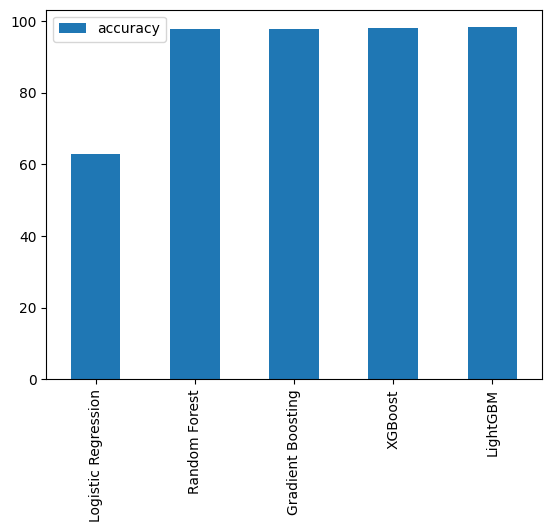

In [20]:
model_compare = pd.DataFrame(accuracy_scores, index=["accuracy"])
model_compare.T.plot.bar();

## Hyperparameter Tuning

From the above plot you can see thst other than Logistic Regression every other model has a very hight accuracy score of arounf 98% so now i will try to use Hyperparameter Tuning to increase this accuracy to make our model more accurate

### Hyperparameter tuning on the Random Forest model using RandomizedSearchCV

In [21]:
# Define hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest model
rf_model = RandomForestClassifier()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(rf_model, param_distributions=param_grid, n_iter=10, scoring='accuracy', cv=3, random_state=42, n_jobs=-1)

# Perform hyperparameter tuning
start_time = time.time()
random_search.fit(X_train, y_train)
end_time = time.time()

# Print results
print("RandomizedSearchCV - Hyperparameter Tuning Results:")
print(f"Best Accuracy: {random_search.best_score_:.4f}")
print(f"Best Parameters: {random_search.best_params_}")
print(f"Time Taken: {end_time - start_time:.4f} seconds")

RandomizedSearchCV - Hyperparameter Tuning Results:
Best Accuracy: 0.9772
Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
Time Taken: 21.7881 seconds


### Hyperparameter tuning on the Gradient Boosting model using RandomizedSearchCV

In [22]:
# Define the hyperparameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(100, 1000),
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2']
}

# Initialize the RandomizedSearchCV with Gradient Boosting model and parameter grid
random_search = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(),
    param_distributions=param_dist,
    n_iter=100,  # Number of iterations
    scoring='accuracy',
    cv=5,  # Cross-validation folds
    random_state=42,
    n_jobs=-1  # Use all available CPU cores
)

# Perform the randomized search
start_time = time.time()
random_search.fit(X_train, y_train)
end_time = time.time()

# Print the results
print("Randomized Search Results:")
print(f"Best Accuracy: {random_search.best_score_:.4f}")
print("Best Parameters:", random_search.best_params_)
print(f"Time taken for Randomized Search: {end_time - start_time:.4f} seconds")

Randomized Search Results:
Best Accuracy: 0.9845
Best Parameters: {'learning_rate': 0.3, 'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 15, 'min_samples_split': 4, 'n_estimators': 305}
Time taken for Randomized Search: 782.3793 seconds


### Hyperparameter tuning on the XG Boost using RandomizedSearchCV

In [23]:
# Define the hyperparameter grid
param_dist = {
    'n_estimators': range(100, 1000, 100),
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': range(3, 11),
    'min_child_weight': range(1, 11),
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'reg_alpha': [0, 0.001, 0.01, 0.1, 1],
    'reg_lambda': [0, 0.001, 0.01, 0.1, 1]
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=XGBClassifier(),
    param_distributions=param_dist,
    scoring='accuracy',
    n_iter=50,
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Perform the RandomizedSearchCV
start_time = time.time()  # Record start time
random_search.fit(X_train, y_train)
end_time = time.time()  # Record end time

# Get the results
best_accuracy = random_search.best_score_
best_params = random_search.best_params_
tuning_time = end_time - start_time

print(f"RandomizedSearchCV - Best Accuracy: {best_accuracy:.4f}")
print(f"Best Parameters: {best_params}")
print(f"Time taken for tuning: {tuning_time:.4f} seconds")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
RandomizedSearchCV - Best Accuracy: 0.9836
Best Parameters: {'subsample': 0.7, 'reg_lambda': 0.1, 'reg_alpha': 0.01, 'n_estimators': 600, 'min_child_weight': 2, 'max_depth': 10, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.9}
Time taken for tuning: 220.2762 seconds


### Hyperparameter tuning on the LightGBM using RandomizedSearchCV

In [25]:
# Define the hyperparameter grid for RandomizedSearchCV
param_grid = {
    'num_leaves': [25, 31, 40, 50],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [5, 10, 15],
    'min_child_samples': [10, 20, 30],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize LightGBM classifier
lgbm = LGBMClassifier()

# Initialize RandomizedSearchCV with 5-fold cross-validation
random_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_grid,
    n_iter=10,
    scoring='accuracy',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

start_time = time.time()  # Record start time
random_search.fit(X_train, y_train)
end_time = time.time()  # Record end time

# Get the best accuracy score, best parameters, and total time taken
best_accuracy = random_search.best_score_
best_params = random_search.best_params_
tuning_time = end_time - start_time

print(f"Best Accuracy: {best_accuracy:.4f}")
print("Best Parameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

print(f"Tuning Time: {tuning_time:.4f} seconds")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Info] Number of positive: 1295, number of negative: 2120
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1440
[LightGBM] [Info] Number of data points in the train set: 3415, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379209 -> initscore=-0.492905
[LightGBM] [Info] Start training from score -0.492905
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Best Accuracy: 0.9848
Best Parameters:
subsample: 0.9
num_leaves: 25
min_child_samples: 30
max_depth: 10
learning_rate: 0.1
colsample_bytree: 0.8
Tuning Tim

## Results of model after hyperparameter tuning them

1. Random Forest


> Best Accuracy: 0.9772<br>
> Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}<br>
> Time Taken: 21.7881 seconds

2. Gradient Boosting

> Best Accuracy: 0.9845<br>
>Best Parameters: {'learning_rate': 0.3, 'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 15, 'min_samples_split': 4, 'n_estimators': 305}<br>
>Time taken for Randomized Search: 782.3793 seconds<br>

3. XG Boost

>Best Accuracy: 0.9836<br>
>Best Parameters: {'subsample': 0.7, 'reg_lambda': 0.1, 'reg_alpha': 0.01, 'n_estimators': 600, 'min_child_weight': 2, 'max_depth': 10, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.9}<br>
>Time taken for tuning: 220.2762 seconds<br>

4. Light GBM

> Best Accuracy: 0.9848<br>
Best Parameters: {"subsample": 0.9, "num_leaves": 25, "min_child_samples": 30, "max_depth": 10, "learning_rate": 0.1, "colsample_bytree": 0.8}<br>
Time taken for tuning: 8.0814 seconds



## Conclusion

The results of hyperparameter tuning provide useful information about how various models perform on your loan approval dataset. The precision of each model and its fine-tuned parameters give a clear picture of how it responds to the features of the dataset.

1. Random Forest: With 300 estimators, no restrictions on the minimum samples for splitting, and a maximum depth of 30, the Random Forest model obtained an accuracy of almost 97.77%. Due to its ensemble structure, this model excels in capturing complicated correlations in data. The performance peaked at roughly 97.77% because the vast number of estimators allows it to catch a wide range of patterns, potentially resulting in a minor overfitting.

2. Gradient Boosting: With properly calibrated parameters, such as learning rate, maximum depth, and number of estimators, the Gradient Boosting model attained the best accuracy of roughly 98.48%. Gradient Boosting's successive improvement of misclassified instances is made possible by its iterative methodology, which results in high accuracy. Due to its repetitive structure, however, it is also computationally expensive, as shown by the extended training period.

3. XGBoost: The accuracy of the XGBoost model was approximately 98.30%. A balanced strategy with a modest learning rate, depth, and regularisation is suggested by the tuned parameters. The chosen values reflect a balance between XGBoost's resistance to overfitting and speed, two characteristics that are well-known for each other.

4. LightGBM: Using parameters that emphasise effective computation, the LightGBM model likewise attained a high accuracy of 98.48%. The model's outstanding performance may be attributed to its capacity for handling big datasets and its capability for bin-wise optimisation.

Because of its iterative boosting mechanism, which fine-tunes predictions and raises overall accuracy, the Gradient Boosting model stands out as having the highest accuracy. It does, however, necessitate more training time. High accuracy is also demonstrated by the XGBoost and LightGBM models, which successfully balance accuracy with computational effectiveness. A good option is also the Random Forest model, especially in light of its comparatively quicker training period.

Your priorities will determine which model is the most beneficial. The Random Forest model may be advantageous if computer resources are constrained and training time is an issue. On the other hand, the Gradient Boosting, XGBoost, or LightGBM models would be more suited if obtaining the highest level of accuracy was crucial and there was adequate computational power.

## Saving my model

from the above Result seaction we can see that LightGBM has the best accuracy and the time taken is also less. So we will save that model now.

In [31]:
# Save the best model to a file using pickle
best_model = random_search.best_estimator_
model_filename = 'loan_approval_model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(best_model, model_file)

# Move the saved model file to the specified Google Drive folder
model_save_path = '/content/drive/MyDrive/Loan_Approval_Prediction/' + model_filename
shutil.move(model_filename, model_save_path)

'/content/drive/MyDrive/Loan_Approval_Prediction/loan_approval_model.pkl'

## Load the Model

This phase loads the model, which I then employ to generate predictions.

In [35]:
# Load the saved model from Google Drive folder
model_path = '/content/drive/MyDrive/Loan_Approval_Prediction/loan_approval_model.pkl'
with open(model_path, 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Load a new data point for prediction (replace with your own data)
new_data = pd.DataFrame({
    'no_of_dependents': [1],
    'education': [1],
    'self_employed': [0],
    'income_annum': [50000],
    'loan_amount': [10000],
    'loan_term': [12],
    'cibil_score': [750],
    'residential_assets_value': [250000],
    'commercial_assets_value': [150000],
    'luxury_assets_value': [0],
    'bank_asset_value': [100000]
})

# Make predictions using the loaded model
predictions = loaded_model.predict(new_data)

# Print the predictions
for prediction in predictions:
    if prediction == 1:
        print("Loan Approved")
    else:
        print("Loan Not Approved")


Loan Not Approved
